In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import os

plt.rcParams['figure.figsize'] = [15, 6]


### Data Loading: Sign Class 0

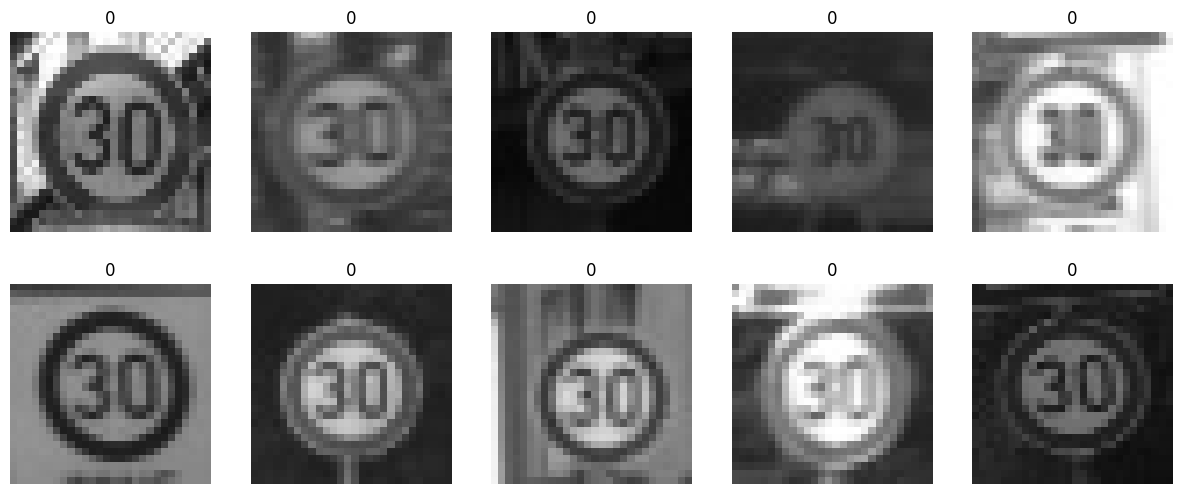

In [2]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

### Data Loading: Sign Class 1

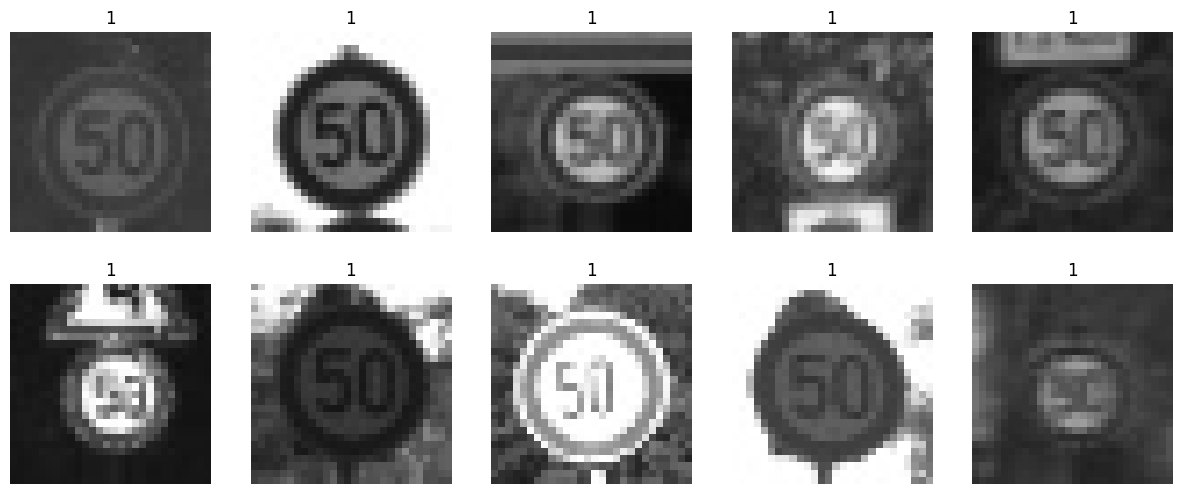

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

### Number of samples

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


### Prepare input for neural network

In [5]:
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

pixels = np.array([image.flatten() for image in images])/255

Images (4470, 28, 28)
Labels (4470,)


### Building neural network

In [254]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

inputs = Input(shape=(pixels.shape[1],), name="Input Layer")
first_layer = Dense(100, activation="elu")(inputs)
second_layer = Dense(200, activation="relu")(first_layer)
third_layer = Dense(300, activation="gelu")(second_layer)
fourth_layer = Dense(400, activation="relu")(third_layer)
fifth_layer = Dense(500, activation="relu")(fourth_layer)
sixth_layer = Dense(600, activation="relu")(fifth_layer)
outputs = Dense(1, activation="leaky_relu")(sixth_layer)
model = Model(inputs, outputs)

model.summary()

tf.keras.utils.plot_model(model, to_file="results/5.png", show_shapes=True, show_layer_names=True, show_layer_activations=True)

model.compile(optimizer ='adam', loss = 'mean_squared_error')

Model: "functional_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input Layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 400)            │       120,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_209 (Dense)               │ (None, 500)            │       200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480,401 (1.83 MB)

 Trainable params: 480,401 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

### Training model

Epoch 1/10


140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0144
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0130
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0245
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0099
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0147
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0214
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0167
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0331
[-0.09008118 -0.02250293  0.00566613  0.02873711  0.00899037 -0.01889597
 -0.09743644 -0.08575112 -0.10370681 -0.02313948  0.05964178 -0.00606422
  0.00424297  0.03284454  0.05329125 -0.10328397  0.01996903  0.08563976
  0.25929633  0.04835439  0.17555498 -0.00770208  0.06029065  0.00529246
  0.07373748  0.10051531 -0.07206719  0.08420862

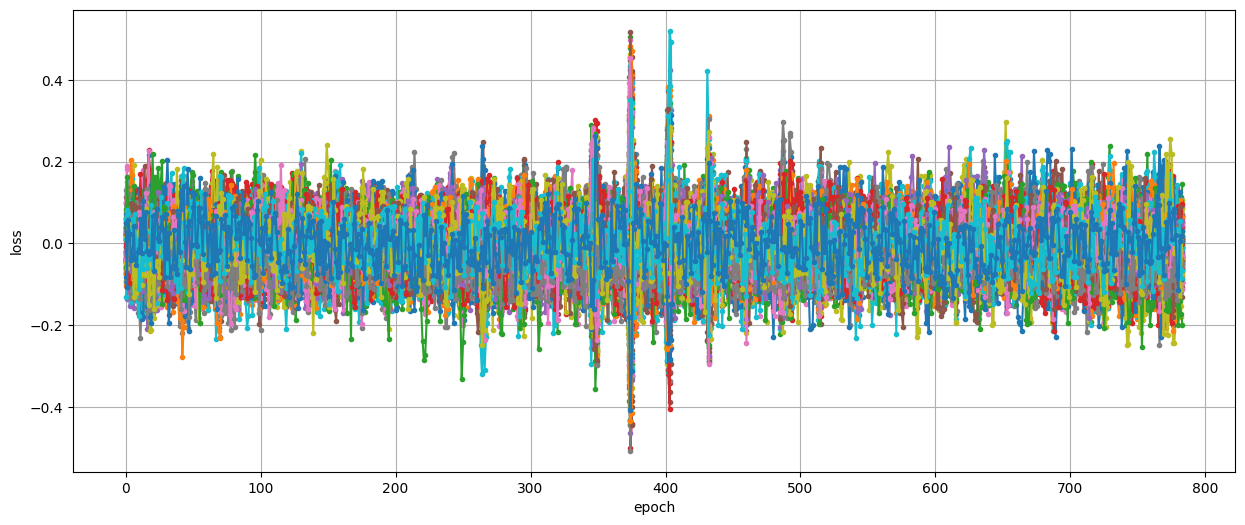

In [263]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

### Performance evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[0.9524198]] 1
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
Accuracy 0.9821029082774049


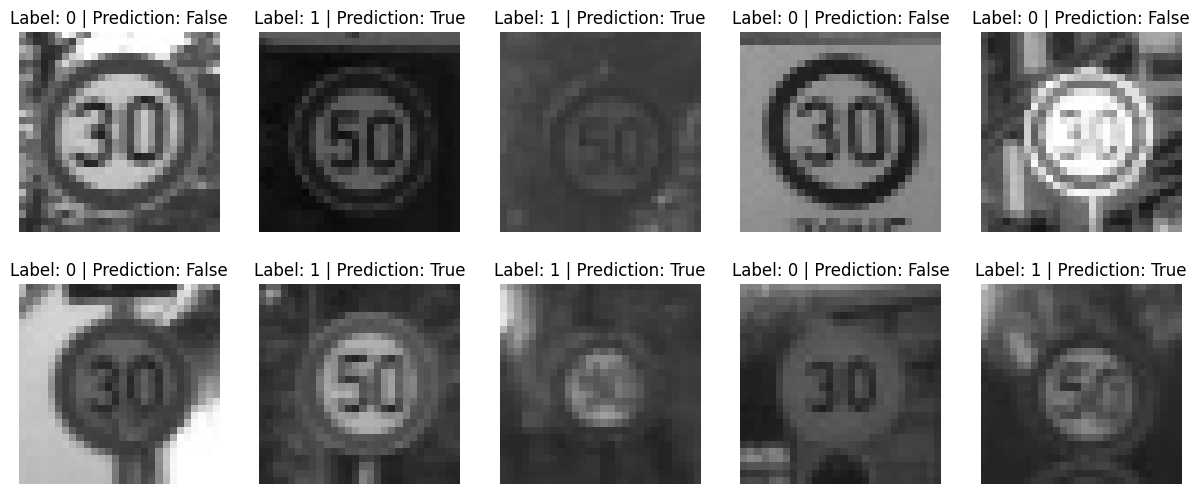

In [264]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

### Results

| Neural Network | Result #1 | Result #2 | Result #3 | Result #4 | Result #5 | Average Accuracy |
|----------------|-----------|-----------|-----------|-----------|-----------|------------------|
| <img src='results/1.png' width='150'>               |   0.8894        |   0.9845        |   0.9970        |     0.9890      |   0.9988        |       0.97174           |
|  <img src='results/2.png' width='150'>              |    0.9624       |    0.9881       |    0.9181       |   0.9612        |    0.9977       |        0.9655          |
|  <img src='results/3.png' width='150'>               |   0.9572        |  0.9695         |    0.9950       |  0.9966         |   0.9901        |    0.9816              |
|  <img src='results/4.png' width='150'>               |   0.9751        |  0.9590         |    0.9957       |  0.9791         |   0.9821        |    0.9782              |
